### CIFAR

In [236]:
#dependencies
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Required Functions

In [237]:
def find_the_highest_val_acc(dict1):
    """Function to find the highest acuracies for all the dataframes
        Args: 
            dict1: dictionary containing all the dataframes
        Returns:
            dictionary containing the experiment and the highest accuracy"""
    dict_max_values ={}
    for csvfile in dict1.keys():
        df = dict1[csvfile]
        for item in df.columns:
            if "val" in item and "acc" in item:
                break
        dict_max_values[csvfile.split('.')[0]] = df[item].max()
        
    return dict_max_values

In [238]:
def dict_df(path, string1):
    """functions to create the dictionary of the file_name and the data
        Args:
            path: path to the logs
            string1: 'cifr' or 'mnist'
        return:
            dictionary with the filename and data
        """
    files = os.listdir(path)
    list1 = []
    for i in files:
        if string1 in i:
            list1.append(i)
    dict_group = {}
    for i in list1:
        dict_group[i] = pd.read_csv(path + i)
    return dict_group

In [239]:
def performance_gain_df(dict_acc, col, col_pretrain):
    """
        Function to create the performance gain dataframes
        args:
            dict_acc: dictionary containing the experiment and the highest accuracy
            col: column name of the base model without pretraining
            col: column name of the base model with pretraining
        returns:
            3 dataframe, 1: performance gain for each experiment, 2: performance gain of without pretrain
            3: performance gain of with pretrain"""

    with_pretrain = {}
    without_pretrain = {}
    val = dict_acc[col]
    val_pretrain = dict_acc[col_pretrain]
    dict_acc_temp = dict_acc.copy()
    dict_acc_temp.pop(col, None)
    dict_acc_temp.pop(col_pretrain, None)
    for i in dict_acc_temp:
        if 'victim' not in i:
            if 'usePretrain' not in i:
                without_pretrain[i] = dict_acc_temp[i]
            else:
                with_pretrain[i] = dict_acc_temp[i]
    
    perf_gain_col = list(without_pretrain.keys())+ [s2] + list(with_pretrain.keys())  
    perf_gain_1_col = without_pretrain.keys()
    perf_gain_2_col = with_pretrain.keys()
    
    perf_gain = [i-val for i in values]
    perf_gain_1= [i-val for i in without_pretrain.values()]
    perf_gain_2 = [i - val_pretrain for i in with_pretrain.values()]
    
    df = pd.DataFrame({'Model': perf_gain_col, 'Gain':perf_gain})
    df_without_pretrain = pd.DataFrame({'Model': perf_gain_1_col, 'Gain':perf_gain_1})
    df_with_pretrain = pd.DataFrame({'Model': perf_gain_2_col, 'Gain':perf_gain_2})
    
    return df, df_without_pretrain, df_with_pretrain

In [240]:
def plot_df(df, x = 'Model', y = 'Gain'):
    """Function to plot the performance gain
        Args:
            df: dataframe with performance gain
            Model: experiment name column
            gain: gain column
        """
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=x,y=y,hue=x,data=df, legend=False, s=70)
    plt.xticks(
        rotation=45, 
        horizontalalignment='right',
        fontweight='light'
       # fontsize='x-large'  
    )
    plt.show()

## CIFAR

In [241]:
# defining the required variables for cifar
path = 'logs/'
string1 = 'cifar'
col = 'attack_cifar'
col_pretrain = 'attack_cifar_usePretrain'


In [242]:
#dictionary containing the filenames and the dataframe
dict_cifar = dict_df(path, string1)

In [243]:
#dictionary containing the accuracies
dict_acc = find_the_highest_val_acc(dict_cifar)

In [244]:
dict_acc

{'attack_cifar': 0.5727000236511229,
 'attack_cifar_mixed': 0.6473000049591064,
 'attack_cifar_mixed_usePretrain': 0.4718999862670898,
 'attack_cifar_pretrain': 0.6880000233650208,
 'attack_cifar_pretrain_mixed': 0.7724999785423279,
 'attack_cifar_pretrain_mixed_usePretrain': 0.7753000259399414,
 'attack_cifar_pretrain_usePretrain': 0.7073000073432922,
 'attack_cifar_usePretrain': 0.6201000213623047,
 'victim_cifar': 0.7071999907493591,
 'victim_cifar_pretrain': 0.7695000171661377}

In [245]:
#dataframes with the performance gain
df, df_without_pretrain, df_with_pretrain = performance_gain_df(dict_acc, col, col_pretrain)

#### performance gain

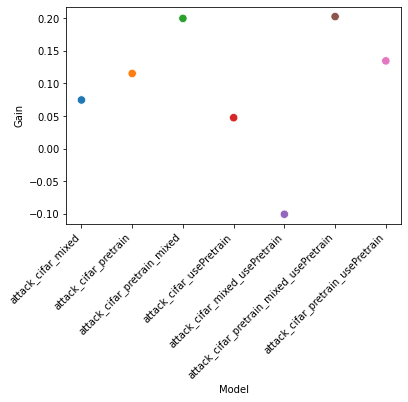

In [247]:
plot_df(df)

#### Without Pretrain

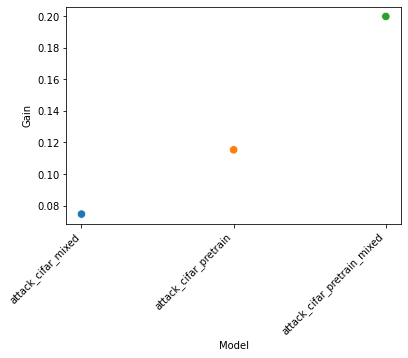

In [248]:
plot_df(df_without_pretrain)

#### With Pretrain

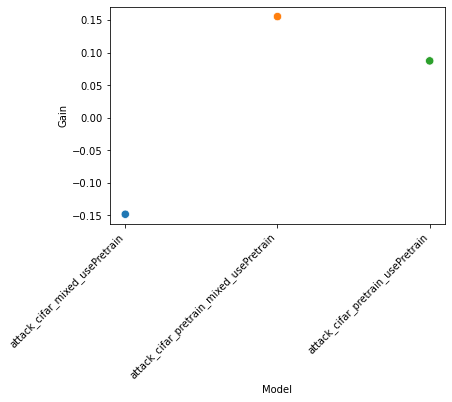

In [249]:
plot_df(df_with_pretrain)

## MNIST

In [250]:
# defining the required variables for cifar
path = 'logs/'
string1 = 'mnist'
col = 'attack_mnist'
col_pretrain = 'attack_mnist_usePretrain'

In [251]:
#dictionary containing the filenames and the dataframe
dict_mnist = dict_df(path, string1)

In [252]:
#dictionary containing the accuracies
dict_acc = find_the_highest_val_acc(dict_mnist)

In [253]:
dict_acc

{'attack_mnist': 0.9897000193595886,
 'attack_mnist_mixed': 0.99099999666214,
 'attack_mnist_mixed_usePretrain': 0.9933000206947328,
 'attack_mnist_pretrain': 0.989199995994568,
 'attack_mnist_pretrain_mixed': 0.991100013256073,
 'attack_mnist_pretrain_mixed_usePretrain': 0.9904999732971193,
 'attack_mnist_pretrain_usePretrain': 0.991100013256073,
 'attack_mnist_usePretrain': 0.9897999763488771,
 'victim_mnist': 0.9932000041007996,
 'victim_mnist_pretrain': 0.992900013923645}

In [254]:
#dataframes with the performance gain
df, df_without_pretrain, df_with_pretrain = performance_gain_df(dict_acc, col, col_pretrain)

#### performance gain

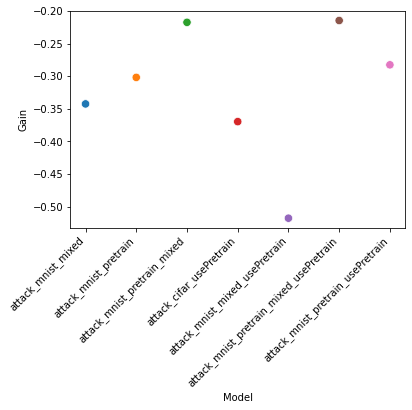

In [255]:
plot_df(df)

#### Without Pretrain

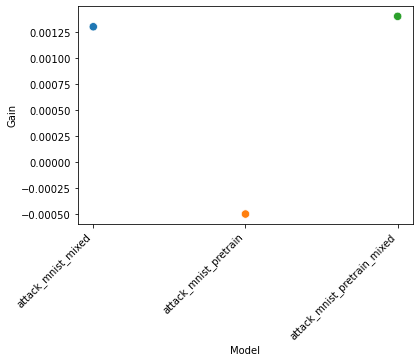

In [256]:
plot_df(df_without_pretrain)

#### with pretrain

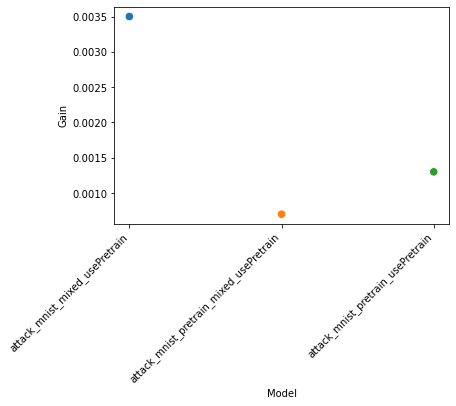

In [257]:
plot_df(df_with_pretrain)